# Implementing the Backpropation Algorithm for a Small Neural Network
`Backpropagation` is the essence of neural net training. It is the practice of fine-tuning the weights of a neural net based on the error rate (i.e. `loss`) obtained in the previous epoch (i.e. `iteration`.) Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization.

For this implementation, I will use a synthetically generated dataset along with tensorflow and other python packages to create a backpropagation-based neural network that can predict continuous values.

## Import Required Packages

In [194]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

## Read In and Setup Training Data
In the code block following, I read in synthetically generated data in the form of 50 instances which have features `A` and `B`.

<br> I format this data into Pandas dataframes which I can then use to perform analyses, or, in this case, create a neural network. 
<br> You can find the raw synthetically generated data [here](https://raw.githubusercontent.com/JordanVencel/smallNeuralNet/main/synthetic_data.csv). 

<br> I then split the data into training and testing sets for further setup with tensorflow. 

In [195]:
training_df = pd.read_csv("https://raw.githubusercontent.com/JordanVencel/smallNeuralNet/main/synthetic_data.csv", names=['A', 'B'])
display(training_df)

x_train, x_test, y_train, y_test = train_test_split(training_df['A'], training_df['B'], test_size=0.20, random_state=0)

x_train = x_train.values.reshape(-1,1)
x_train = pd.DataFrame(x_train)

x_test = x_test.values.reshape(-1,1)
x_test = pd.DataFrame(x_test)

y_train = y_train.values.reshape(-1,1)
y_train = pd.DataFrame(y_train)

y_test = y_test.values.reshape(-1,1)
y_test = pd.DataFrame(y_test)

,A,B
0,0.318328,0.750789
1,0.344461,-0.648483
2,0.357117,1.122161
3,0.461714,-0.024687
4,0.971318,2.558952
5,0.975404,2.707666
6,1.269868,3.532343
7,1.418863,2.639893
8,1.576131,1.487547
9,1.711867,2.339642


## Quick Data Vizualization
Here is a simple scatterplot visualization of the raw data we read in from GitHub.

[Text(0.5, 1.0, 'Raw GitHub Data')]

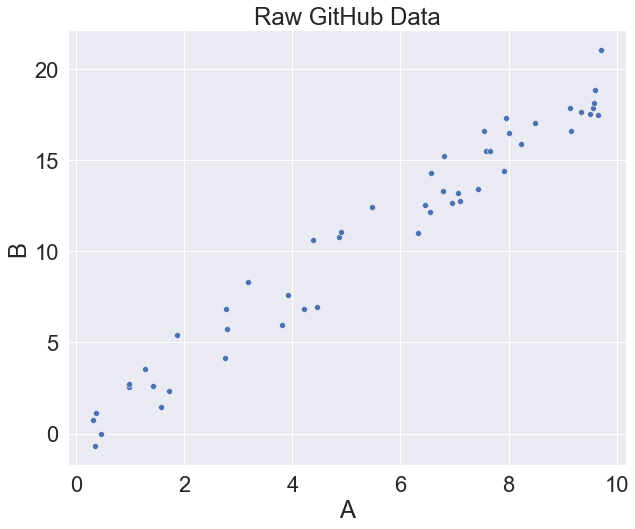

In [196]:
import seaborn as sb
sb.set(rc={'figure.figsize':(10,8)}, font_scale=2)
sb.scatterplot(data=training_df, x='A',y='B').set(title="Raw GitHub Data")

## Define Neural Network Functions
Next, we will define the various functions used to create, train, and propagate through the neural network.
<br> Once those functions are defined, we can define our loss function and train our model. 

In [197]:
def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
  x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns= x_test.columns)
  return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

# I have tuned the values of these parameters to fit the data better. 
hidden_units1 = 80
hidden_units2 = 880
hidden_units3 = 256
learning_rate = 0.01

def build_model():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='linear'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='linear'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='linear'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

model = build_model()

msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

print("Training model...\n")
history = model.fit(x_train_scaled.values, y_train.values, epochs=20, batch_size=64,validation_split=0.2)
print("\nTraining complete!")

Training model...

Epoch 1/20
1/1 [==============================] - 1s 625ms/step - loss: 5.9253 - mean_squared_logarithmic_error: 5.9253 - val_loss: 1.8262 - val_mean_squared_logarithmic_error: 1.8262
Epoch 2/20
1/1 [==============================] - 0s 24ms/step - loss: 3.0750 - mean_squared_logarithmic_error: 3.0750 - val_loss: 0.7614 - val_mean_squared_logarithmic_error: 0.7614
Epoch 3/20
1/1 [==============================] - 0s 23ms/step - loss: 1.4227 - mean_squared_logarithmic_error: 1.4227 - val_loss: 0.5799 - val_mean_squared_logarithmic_error: 0.5799
Epoch 4/20
1/1 [==============================] - 0s 22ms/step - loss: 1.1977 - mean_squared_logarithmic_error: 1.1977 - val_loss: 0.9875 - val_mean_squared_logarithmic_error: 0.9875
Epoch 5/20
1/1 [==============================] - 0s 23ms/step - loss: 1.2846 - mean_squared_logarithmic_error: 1.2846 - val_loss: 1.2139 - val_mean_squared_logarithmic_error: 1.2139
Epoch 6/20
1/1 [==============================] - 0s 24ms/step - 

We can breifly show the change in the mean squared error over the training iterations. 

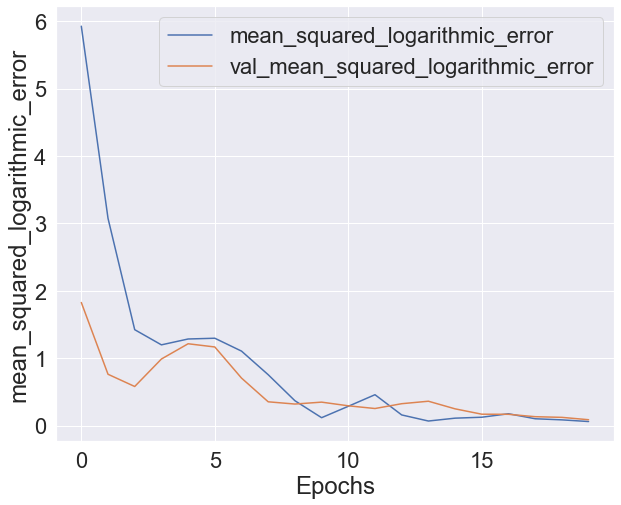

In [198]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()

# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

## Make Predictions on Data
Finally, we can reinsert the values of the `A` feature into our neural network to see what it predicts the values of the `B` column to be. These values will be in the column labeled `prediction`.

In [199]:
standard_scaler = StandardScaler()
a_df = training_df['A'].values.reshape(-1,1)
a_df = pd.DataFrame(a_df)
a_scaled = pd.DataFrame(standard_scaler.fit_transform(a_df), columns=a_df.columns)

training_df['prediction'] = model.predict(a_scaled)
display(training_df)


2/2 [==============================] - 0s 2ms/step


,A,B,prediction
0,0.318328,0.750789,1.142201
1,0.344461,-0.648483,1.190139
2,0.357117,1.122161,1.213356
3,0.461714,-0.024687,1.405234
4,0.971318,2.558952,2.340073
5,0.975404,2.707666,2.347569
6,1.269868,3.532343,2.887747
7,1.418863,2.639893,3.161070
8,1.576131,1.487547,3.449568
9,1.711867,2.339642,3.698569


## Visualize Data with Predictions
Then we can vizualize the predicted data values in comparison with the ground truth values. 

<AxesSubplot:title={'center':'Neural Network Outputs'}, xlabel='A', ylabel='B'>

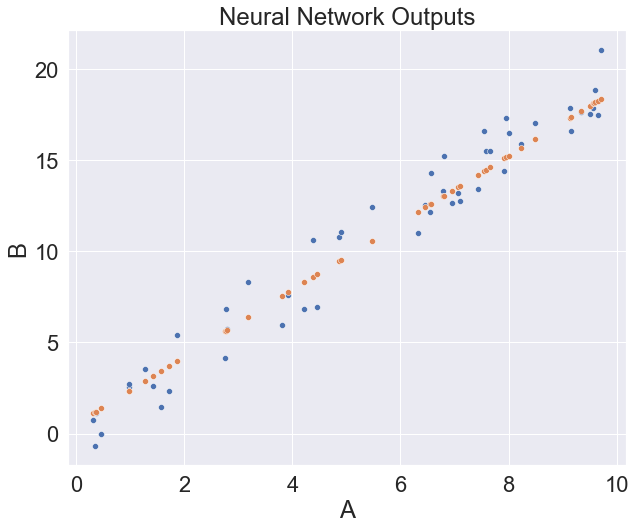

In [200]:
fig.legend(labels=['Original Data', 'Predicted Data'])
sb.scatterplot(data=training_df, x='A',y='B').set(title="Neural Network Outputs")
sb.scatterplot(data=training_df, x='A',y='prediction')